In [1]:
! pip install mglearn #install mglearn#
import os
from sklearn.pipeline import make_pipeline # import a function for making an aggregation function
from sklearn.model_selection import GridSearchCV # this function can tune the parameter for finding the best one
from sklearn.metrics import confusion_matrix # evaluation
from sklearn.linear_model import LogisticRegression # machine learning method
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #import two function to clean data and prepare data for trianing and testing
from sklearn.model_selection import train_test_split # split dataset into train and test function
import mglearn
import numpy as np #an wildly used package
import pandas as pd # an wildly used function
import seaborn as sn # an extension for matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import nltk # natural language package
from nltk.corpus import stopwords 
from string import punctuation
from gensim.sklearn_api import W2VTransformer
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

    100% |████████████████████████████████| 542kB 9.9MB/s eta 0:00:01
  Stored in directory: /tmp/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


using pd.read_csv to read file

In [2]:
data = pd.read_csv("../input/SPAM text message 20170820 - Data.csv")

In [3]:
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)
# this is the function to remove punction

In [4]:
def digit_punctuation(s):
    return ''.join([i for i in s if not i.isdigit()])
# this is the function to remove digits

In [5]:
def cleanupDoc(s):
 stopset = set(stopwords.words('english'))
 tokens = nltk.word_tokenize(s)
 cleanup = [token.lower() for token in tokens if token.lower() not in stopset and  len(token)>2]
 return cleanup
# this is the function to remove stop words 

In [7]:
texts = []
labels = []
for i, label in enumerate(data['Category']):
    strip_no_punt=strip_punctuation(data['Message'][i].lower())
    sttrip_nodigit=digit_punctuation(strip_no_punt)
    texts.append(cleanupDoc(sttrip_nodigit))
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)
# this is the pipeline from remove punction, digits, to remove stop words and tonkenize

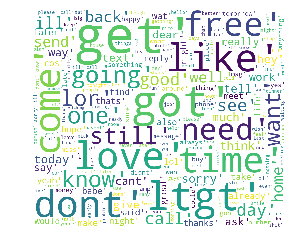

In [8]:
wordcloud = WordCloud(background_color='white',max_words=200,max_font_size=200,width=1000, height=860, random_state=42).generate(str(texts))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)
# this is the commend to create word cloud

In [9]:
model = W2VTransformer(size=10, min_count=1, seed=1)
wordvecs = model.fit(texts)
# this is the commend to create word2vector

In [12]:
print(texts[1])
print (wordvecs.transform(texts[1]))
# print the first line of texts and its corresponding w2v array

['lar', 'joking', 'wif', 'oni']
[[ 2.5158331e-01  4.0332106e-01  2.1250511e-02  3.6034908e-02
  -2.0389245e-01  2.8932539e-01 -2.8312349e-01 -3.1471005e-01
   4.4910860e-01 -2.9643837e-01]
 [ 2.8759651e-02  4.3606374e-02 -2.6288297e-02  4.2491794e-02
  -5.9373923e-02  7.5879432e-02 -5.3465758e-02 -7.2446942e-02
   1.0093883e-01 -5.2315397e-03]
 [ 2.7501747e-01  2.6319131e-01  3.8740005e-02  2.6038773e-02
  -1.8142465e-01  2.4433331e-01 -1.8817839e-01 -1.7036271e-01
   3.1056935e-01 -2.6306230e-01]
 [ 2.4877535e-02  3.1866912e-02 -3.2289468e-02  4.1786127e-02
   1.2439211e-02  1.6653318e-02 -2.4170829e-02  2.7763794e-04
   3.7826650e-02 -5.1442690e-02]]


In [16]:
w2varray = []
for i in range(len(texts)):
    transformob=np.sum(wordvecs.transform(texts[i]),axis=0)
    w2varray.append(transformob)
# create the whole w2v dataset

In [21]:
X_train, X_test, y_train, y_test = train_test_split(w2varray , labels, test_size=0.1, random_state=42)
# split train and test dataset

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

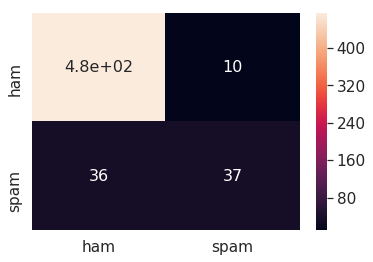

In [23]:
logreg = LogisticRegression() # call M.L. methods 
param_grid = {'C': [0.01, 0.1, 1, 10, 100]} # call M.L. parameters
grid = GridSearchCV(logreg, param_grid, cv=5) # set cross validation for fining appropriate parameter
logreg_train = grid.fit(X_train, y_train) # fit training dataset
pred_logreg = logreg_train.predict(X_test) # predict dataset
confusion = confusion_matrix(y_test, pred_logreg) # using confusion matrix to evaluate
df_cm = pd.DataFrame(confusion, ['ham','spam'],['ham','spam']) 
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}) #create heatmap

**CountVectorizer** without stop_word

In [24]:
texts2 = []
labels = []
for i, label in enumerate(data['Category']):
    strip_no_punt=strip_punctuation(data['Message'][i].lower())
    sttrip_nodigit=digit_punctuation(strip_no_punt)
    texts2.append(sttrip_nodigit)
    if label == 'ham':
        labels.append(0)
    else:
        labels.append(1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(texts2 , labels, test_size=0.1, random_state=42)

In [26]:
vect = CountVectorizer().fit(X_train)
X_train_cv_without_stop_word = vect.transform(X_train)
X_test_cv_without_stop_word = vect.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


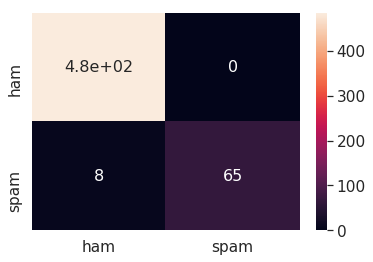

In [27]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train_cv_without_stop_word, y_train)
pred_logreg = logreg_train.predict(X_test_cv_without_stop_word )
confusion = confusion_matrix(y_test, pred_logreg)
df_cm = pd.DataFrame(confusion, ['ham','spam'],['ham','spam'])
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


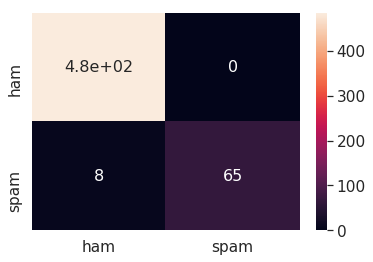

In [34]:
logreg = LogisticRegression()
pipe = make_pipeline(CountVectorizer(), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
confusion = confusion_matrix(y_test, pred_logreg)
df_cm = pd.DataFrame(confusion, ['ham','spam'],['ham','spam'])
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})
# alternative codes

In [28]:
max_value = X_train_cv_without_stop_word.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vect.get_feature_names())

print("features with lowest cv_without_stop_word")
print(feature_names[sorted_by_tfidf[:20]], '\n')

print("features with highest cv_without_stop_word")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest cv_without_stop_word
['aah' 'ppw' 'pptxt' 'pptxnormal' 'ppmsg' 'ppmpoboxbhambxe' 'ppm' 'pple'
 'ppl' 'ppermesssubscription' 'poyyarikaturkolathupalayamunjalur'
 'powerful' 'pours' 'prabhaim' 'poured' 'pound' 'pouch' 'potter'
 'potential' 'potato'] 

features with highest cv_without_stop_word
['simple' 'is' 'ur' 'missing' 'for' 'day' 'if' 'can' 'hi' 'to' 'will' 'do'
 'it' 'the' 'face' 'be' 'my' 'you' 'happy' 'ltgt']


Text(0.5,1,'CountVectorizer_without_stop_word-cofficient')

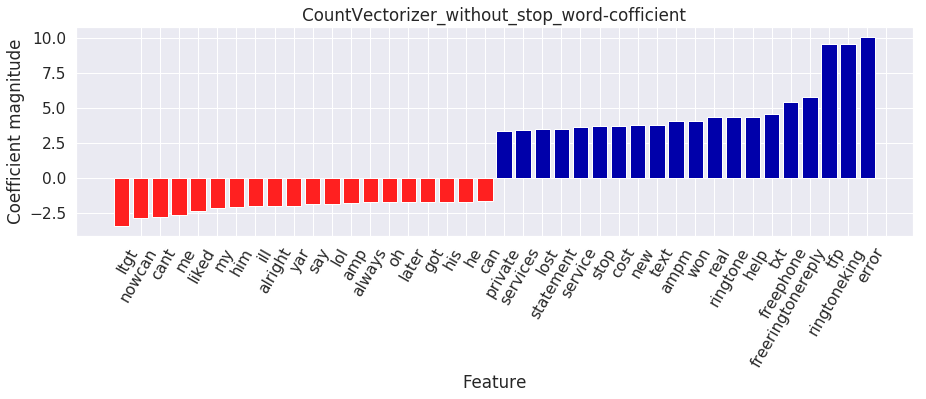

In [29]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=20)
plt.title("CountVectorizer_without_stop_word-cofficient")

**TfidfVectorizer** without stop word

In [39]:
vect = TfidfVectorizer().fit(X_train)
X_train_tf_without_stop_word = vect.transform(X_train)
X_test_tf_without_stop_word = vect.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


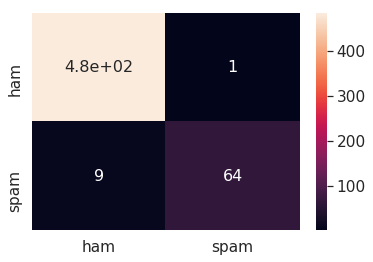

In [40]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train_tf_without_stop_word, y_train)
pred_logreg = logreg_train.predict(X_test_tf_without_stop_word)
confusion = confusion_matrix(y_test, pred_logreg)
df_cm = pd.DataFrame(confusion, ['ham','spam'],['ham','spam'])
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [41]:
max_value = X_train_tf_without_stop_word.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vect.get_feature_names())

print("features with lowest tf_without_stop_word")
print(feature_names[sorted_by_tfidf[:20]], '\n')

print("features with highest tf_without_stop_word")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tf_without_stop_word
['sorrowsi' 'makiing' 'attractioni' 'hermy' 'hershe' 'herwill' 'praises'
 'meshe' 'thenwill' 'dreamlove' 'proove' 'namemy' 'planeti' 'thoughtsi'
 'sambarlife' 'friendshipmotherfatherteacherschildrens' 'approaching'
 'republic' 'independence' 'shivratri'] 

features with highest tf_without_stop_word
['lei' 'lmaonice' 'alrite' 'nite' 'okie' 'ok' 'tfp' 'thank' 'ringtoneking'
 'thanx' 'too' 'gwr' 'error' 'where' 'yup' 'beerage' 'anything' 'anytime'
 'havent' 'staffsciencenusedusgphyhcmkteachingpc']


Text(0.5,1,'TfidfVectorizer_without_stop_word-cofficient')

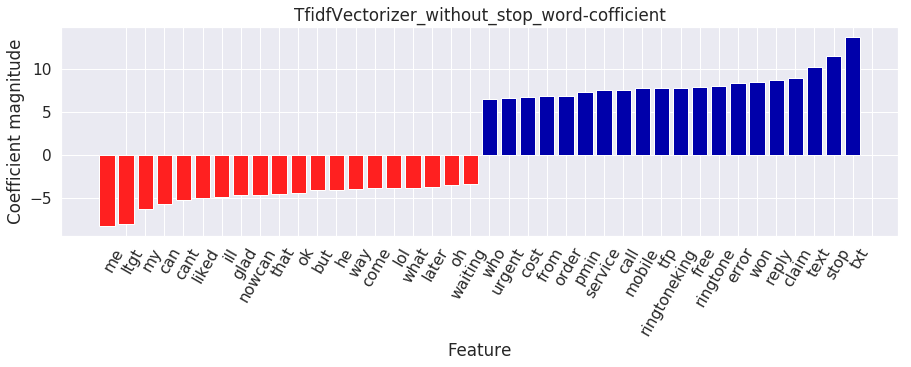

In [42]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=20)
plt.title("TfidfVectorizer_without_stop_word-cofficient")

*TfidfVectorizer** exclude words which below presenting 3 times in a document

In [35]:
vect = TfidfVectorizer(stop_words='english',min_df=3).fit(X_train)
X_train_tf_with_stop_word_3 = vect.transform(X_train)
X_test_tf_with_stop_word_3 = vect.transform(X_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


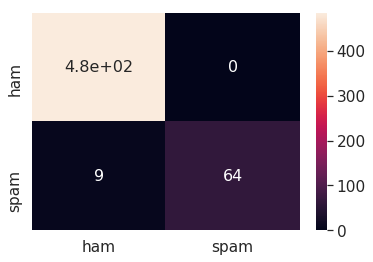

In [36]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train_tf_with_stop_word_3, y_train)
pred_logreg = logreg_train.predict(X_test_tf_with_stop_word_3)
confusion = confusion_matrix(y_test, pred_logreg)
df_cm = pd.DataFrame(confusion, ['ham','spam'],['ham','spam'])
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [37]:
max_value = X_train_tf_with_stop_word_3 .max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vect.get_feature_names())

print("features with lowest tf_without_stop_word_3")
print(feature_names[sorted_by_tfidf[:20]], '\n')

print("features with highest tf_without_stop_word_3")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tf_without_stop_word_3
['questioned' 'vegetables' 'neighbour' 'siri' 'gardener' 'personality'
 'wonders' 'telphone' 'invnted' 'margaret' 'moralone' 'storming' 'phne'
 'grahmbell' 'nokias' 'moons' 'alfie' 'lvblefrnd' 'lifpartnr' 'swtheart'] 

features with highest tf_without_stop_word_3
['meet' 'bags' 'hello' 'problem' 'available' 'started' 'hey' 'pub'
 'number' 'talk' 'babe' 'thursday' 'standing' 'maybe' 'error' 'away' 'hi'
 'hit' 'tell' 'series']


Text(0.5,1,'TfidfVectorizer_with_stop_word-cofficient_3')

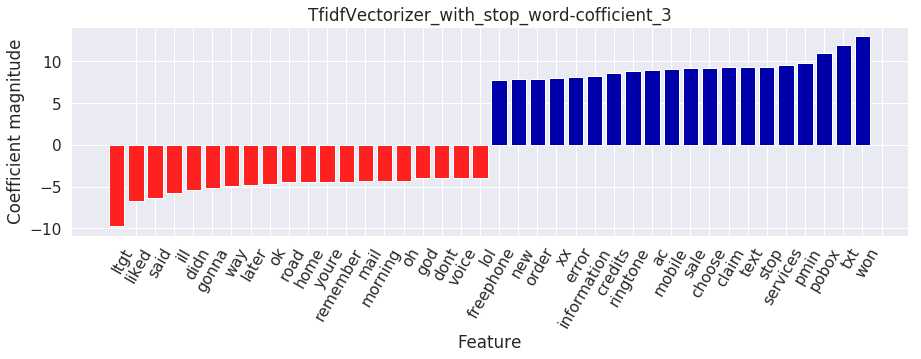

In [38]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.coef_, feature_names, n_top_features=20)
plt.title("TfidfVectorizer_with_stop_word-cofficient_3")